In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
data=pd.read_csv('Cardiotocographic.csv')

### Data Examination

In [3]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
data.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
2121,140.0,0.000000,0.961268,0.007426,0.0,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.0,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.0,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.0,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.0,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.0,2.000000
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.0,1.000000


In [5]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


### Insights

Columns like FM, ALTV, MLTV, and Width have extremely wide ranges and high standard deviations, indicating the presence of strong outliers—e.g.,
FM ranges from -0.4 to 0.9, and ALTV from -91 to 182. 

some columns such as LB, ASTV, Width, and Tendency contain **negative values** that may not be valid depending on the context.

The target column NSP ranges from -1.02 to 5, which is unusual if it's a class label it may imply label noise or incorrect entries. 


In [6]:
data.shape

(2126, 14)

In [7]:
data.index

RangeIndex(start=0, stop=2126, step=1)

In [8]:
data.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


### Handle Target Variable (NSP)

In [10]:
NSP_mode=data['NSP'].mode()[0]
NSP_mode

1.0

In [11]:
data['NSP'] = data['NSP'].round(1)
data.loc[data['NSP'] < 1.0, 'NSP'] = NSP_mode
data.loc[data['NSP'] > 3.0, 'NSP'] = NSP_mode
data['NSP']=data['NSP'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LB        2105 non-null   float64 
 1   AC        2106 non-null   float64 
 2   FM        2126 non-null   float64 
 3   UC        2126 non-null   float64 
 4   DL        2126 non-null   float64 
 5   DS        2105 non-null   float64 
 6   DP        2105 non-null   float64 
 7   ASTV      2126 non-null   float64 
 8   MSTV      2126 non-null   float64 
 9   ALTV      2126 non-null   float64 
 10  MLTV      2105 non-null   float64 
 11  Width     2105 non-null   float64 
 12  Tendency  2105 non-null   float64 
 13  NSP       2105 non-null   category
dtypes: category(1), float64(13)
memory usage: 218.3 KB


### Handle Duplicate Values

In [12]:
data[data.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2124 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LB        2103 non-null   float64 
 1   AC        2104 non-null   float64 
 2   FM        2124 non-null   float64 
 3   UC        2124 non-null   float64 
 4   DL        2124 non-null   float64 
 5   DS        2103 non-null   float64 
 6   DP        2103 non-null   float64 
 7   ASTV      2124 non-null   float64 
 8   MSTV      2124 non-null   float64 
 9   ALTV      2124 non-null   float64 
 10  MLTV      2103 non-null   float64 
 11  Width     2103 non-null   float64 
 12  Tendency  2103 non-null   float64 
 13  NSP       2103 non-null   category
dtypes: category(1), float64(13)
memory usage: 234.5 KB


### Handle Null Values

In [15]:
data.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

#### There are null values 8 columns that has null values that are given as below
#### Calculating Mean values for every numercial column and replacing the null values with them

In [16]:
LB_mean = np.round(data['LB'].mean(),3)
LB_mean

133.342

In [17]:
AC_mean = np.round(data['AC'].mean(),4)
AC_mean

0.0032

In [18]:
DS_mean = np.round(data['DS'].mean(),6)
DS_mean

3e-06

In [19]:
DP_mean = np.round(data['DP'].mean(),6)
DP_mean

0.000175

In [20]:
MLTV_mean = np.round(data['MLTV'].mean(),3)
MLTV_mean

8.281

In [21]:
Width_mean = np.round(data['Width'].mean(),3)
Width_mean

70.461

In [22]:
Tendency_mean = np.round(data['Tendency'].mean(),3)
Tendency_mean

0.317

#### Filling Data with calculated values

In [23]:
data.fillna(
    {
        'LB': LB_mean,
        'AC': AC_mean,
        'DS':DS_mean,
        'DP':DP_mean,
        'MLTV':MLTV_mean,
        'Width':Width_mean,
        'Tendency':Tendency_mean,
        'NSP':NSP_mode
        
    },inplace=True
)

In [24]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [25]:
print(data.isna().sum())
data.info()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2124 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LB        2124 non-null   float64 
 1   AC        2124 non-null   float64 
 2   FM        2124 non-null   float64 
 3   UC        2124 non-null   float64 
 4   DL        2124 non-null   float64 
 5   DS        2124 non-null   float64 
 6   DP        2124 non-null   float64 
 7   ASTV      2124 non-null   float64 
 8   MSTV      2124 non-null   float64 
 9   ALTV      2124 non-null   float64 
 10  MLTV      2124 non-null   float64 
 11  Width     2124 non-null   float64 
 12  Tendency  2124 non-null   float64 
 13  NSP       2124 non-null   category
dtypes: category(1), float64(13)
memory usage: 23

### Detecting Outliers and Replacing Outliers by Imputation

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'LB'),
  Text(1, 0, 'AC'),
  Text(2, 0, 'FM'),
  Text(3, 0, 'UC'),
  Text(4, 0, 'DL'),
  Text(5, 0, 'DS'),
  Text(6, 0, 'DP'),
  Text(7, 0, 'ASTV'),
  Text(8, 0, 'MSTV'),
  Text(9, 0, 'ALTV'),
  Text(10, 0, 'MLTV'),
  Text(11, 0, 'Width'),
  Text(12, 0, 'Tendency')])

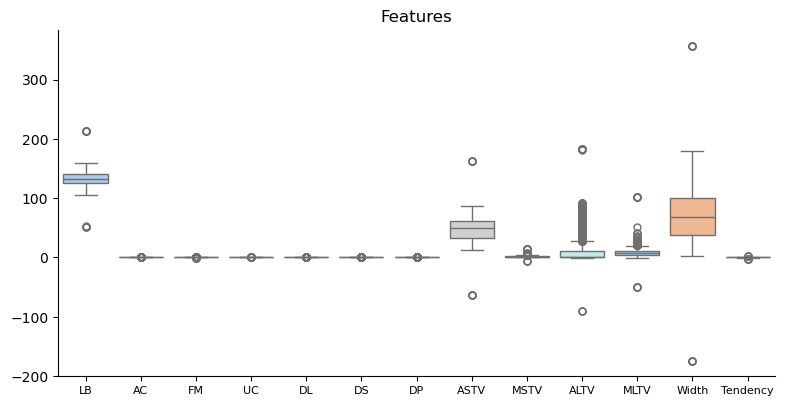

In [26]:
import seaborn as sns
sns.catplot(data,
            kind='box',
            height=4,
            aspect=2,
            palette='pastel')

plt.title('Features')
plt.xticks(fontsize=8)

In [27]:
cleaned_data = data.copy()
for col in cleaned_data.select_dtypes(include='float64').columns:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        non_outlier_mean = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)][col].mean()

        cleaned_data[col] = cleaned_data[col].apply(
            lambda x: non_outlier_mean if x < lower_bound or x > upper_bound else x)
cleaned_data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0,2124.0,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000
mean,133.266994,0.002972,0.000663,0.004344,0.001408,0.0,0.0,47.000692,1.236240,3.108255,7.593042,70.361530,0.321010
std,9.739704,0.003500,0.001277,0.002911,0.002131,0.0,0.0,17.154075,0.685111,5.642922,4.436988,38.619455,0.606911
min,106.000000,-0.000185,-0.003435,-0.000132,-0.000124,0.0,0.0,11.799846,0.200000,-1.043619,-0.200788,3.000000,-1.006614
25%,126.000000,0.000000,0.000000,0.001880,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.671705,37.000000,0.000000
50%,133.000000,0.001689,0.000000,0.004455,0.000000,0.0,0.0,48.000000,1.200000,0.000000,7.500000,68.276484,0.000000
75%,140.000000,0.005107,0.000663,0.006505,0.002201,0.0,0.0,61.000000,1.600000,3.108255,10.200000,99.000000,1.000000
max,160.000000,0.014024,0.006272,0.012987,0.008197,0.0,0.0,87.000000,3.200000,27.000000,20.040354,180.000000,1.023635


#### Since fields like DS, DP have very small values, and those are less in number, the outlier replacement overlooks actual data(no abnormality) as outliers and replaces it with a much more smaller mean that accounts to zero on the statistical summary

In [28]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.00000,2124.000000,2124.000000
mean,133.342023,0.003220,0.009904,0.004394,0.001897,0.000003,0.000175,47.012459,1.364345,10.295650,8.28055,70.461052,0.316676
std,11.212396,0.004371,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.73642,42.726905,0.642653
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.70000,-174.000000,-3.000000
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.60000,37.000000,0.000000
50%,133.000000,0.001668,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.50000,68.000000,0.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.80000,100.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.40000,357.000000,3.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_10552\2820256821.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data,


0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2124, dtype: category
Categories (3, float64): [1.0, 2.0, 3.0]

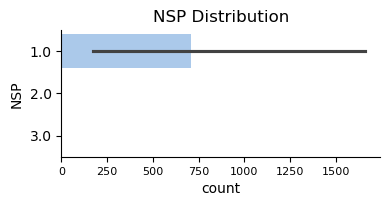

In [29]:
sns.catplot(data,
            y=data['NSP'],
            x=data['NSP'].value_counts(),
            kind='bar',
            height=2,
            aspect=2,
            palette='pastel',
           legend=False)

plt.title('NSP Distribution')
plt.xticks(fontsize=8)
data['NSP']

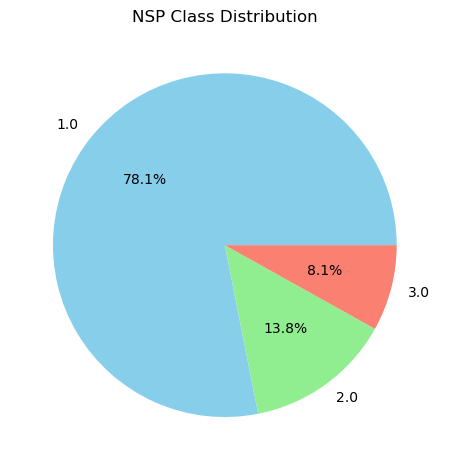

In [30]:
data['NSP'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('NSP Class Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


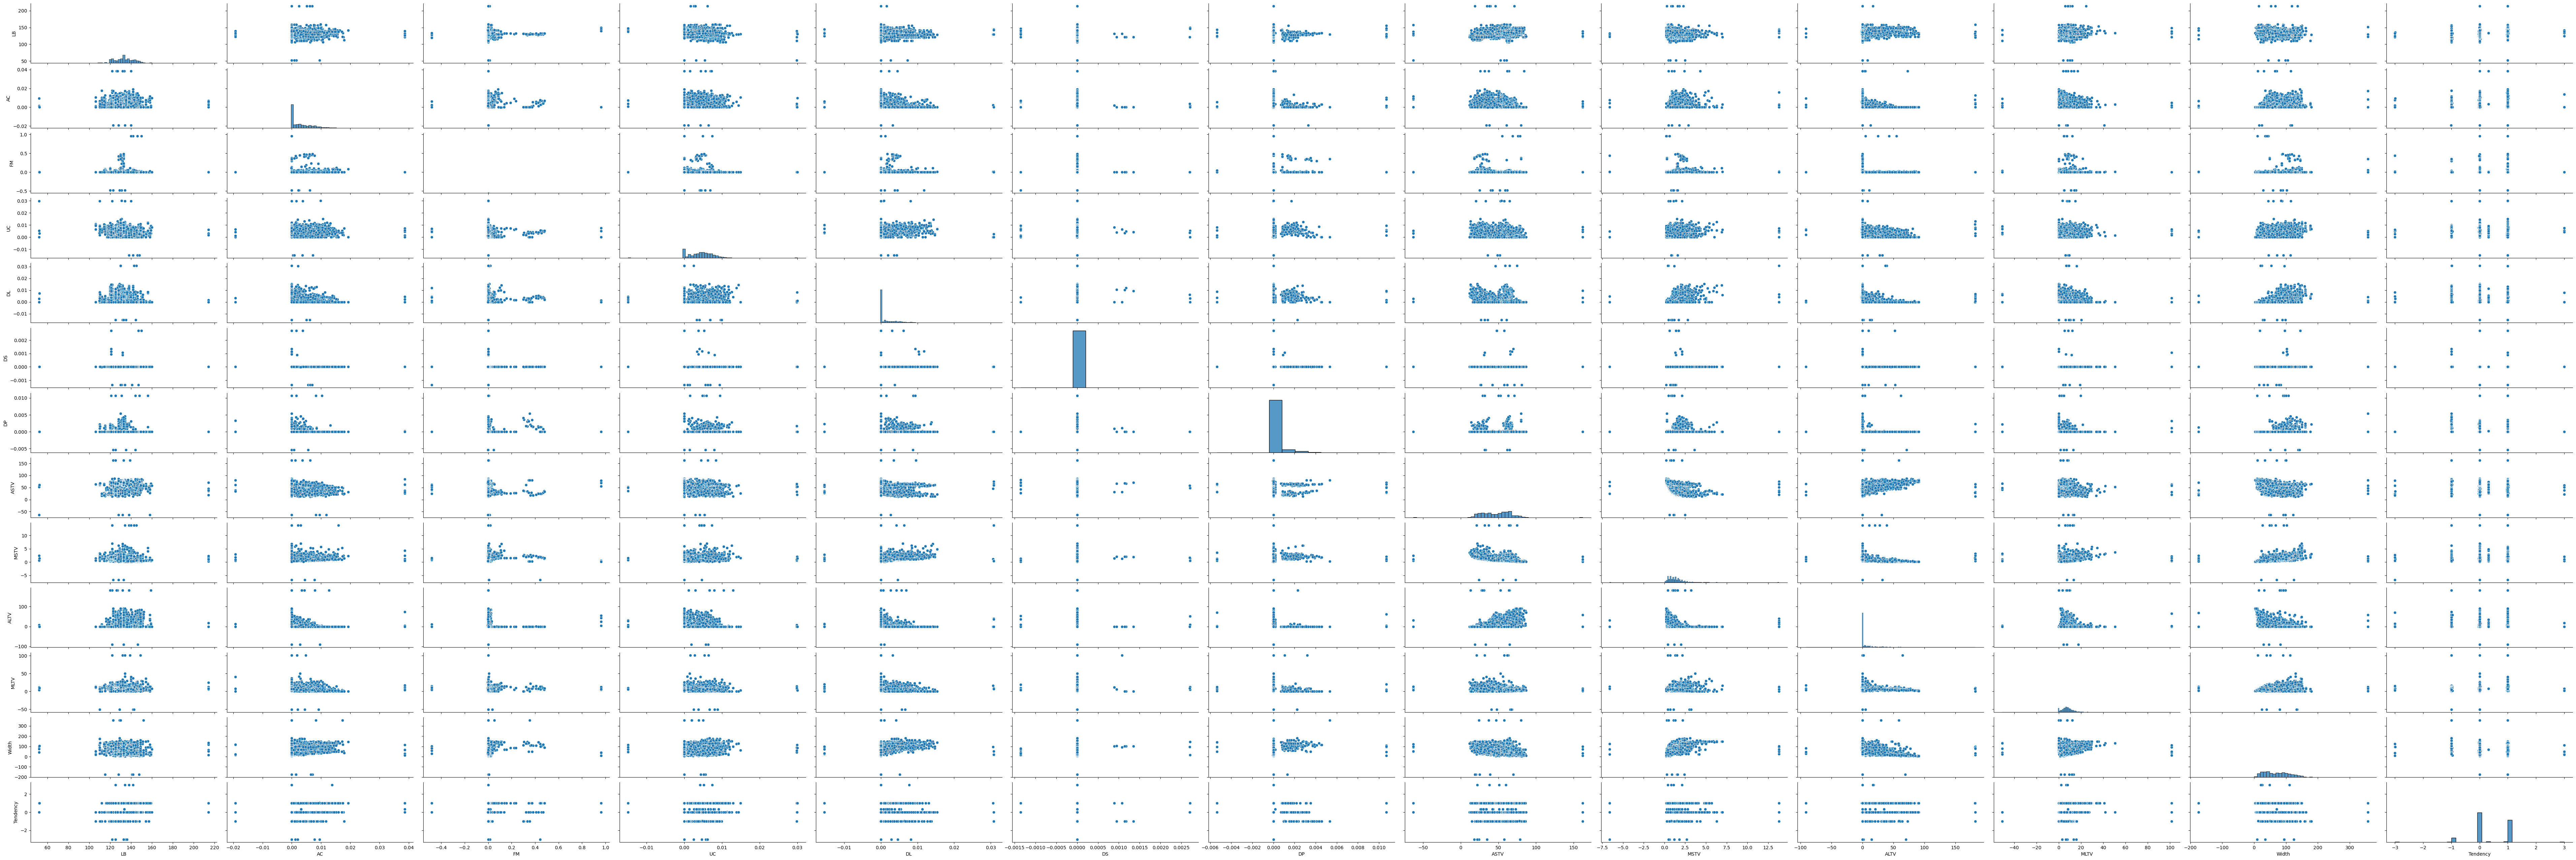

In [31]:
sns.pairplot(data,height=2,aspect=3)

In [34]:
data.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063452,0.018809,-0.166642,-0.126557,-0.005439,-0.047726,0.241666,-0.169224,0.210673,-0.003225,-0.118375,0.237112,0.135299
AC,-0.063452,1.000000,0.009411,0.071549,-0.093333,-0.033096,-0.083332,-0.231061,0.133896,-0.271190,-0.104657,0.234720,0.031898,-0.325924
FM,0.018809,0.009411,1.000000,-0.053386,0.009641,0.029893,0.121249,-0.032838,0.017061,-0.012005,-0.006156,0.097125,-0.018409,0.080788
UC,-0.166642,0.071549,-0.053386,1.000000,0.189737,-0.006939,0.070348,-0.182379,0.189685,-0.227881,-0.048754,0.106550,-0.066949,-0.190853
DL,-0.126557,-0.093333,0.009641,0.189737,1.000000,0.058432,0.144853,-0.069907,0.410216,-0.187275,-0.164942,0.408427,-0.023758,0.052971
DS,-0.005439,-0.033096,0.029893,-0.006939,0.058432,1.000000,0.004282,0.008414,0.016089,-0.004411,0.034366,0.040831,-0.015408,0.068785
DP,-0.047726,-0.083332,0.121249,0.070348,0.144853,0.004282,1.000000,0.037955,0.119268,-0.077759,-0.113993,0.175240,-0.130510,0.315694
ASTV,0.241666,-0.231061,-0.032838,-0.182379,-0.069907,0.008414,0.037955,1.000000,-0.293820,0.357310,-0.219225,-0.207778,-0.011331,0.438360
MSTV,-0.169224,0.133896,0.017061,0.189685,0.410216,0.016089,0.119268,-0.293820,1.000000,-0.291979,0.028653,0.433232,-0.036650,-0.089611
ALTV,0.210673,-0.271190,-0.012005,-0.227881,-0.187275,-0.004411,-0.077759,0.357310,-0.291979,1.000000,-0.107331,-0.346496,0.036502,0.378595


<Axes: >

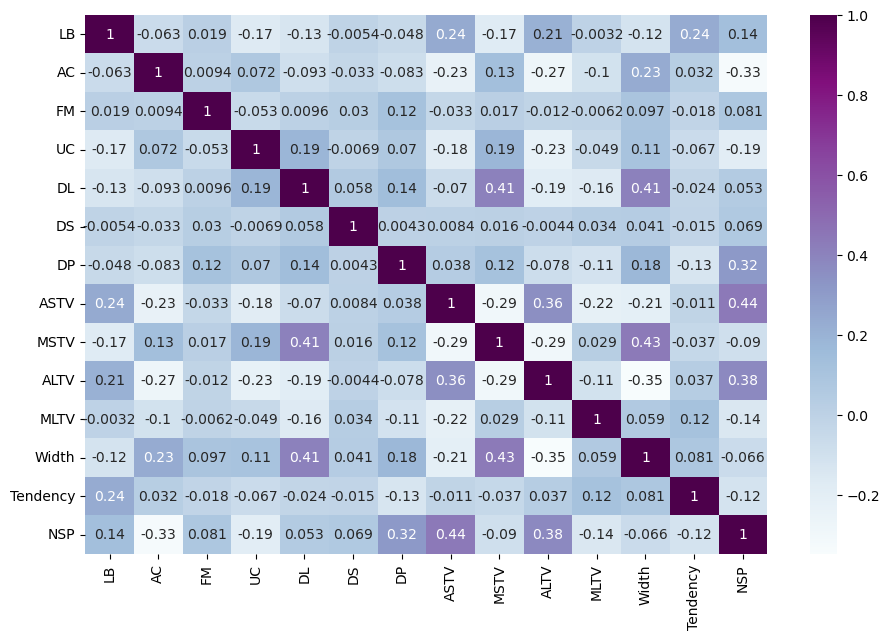

In [40]:
plt.figure(figsize=(11,7))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')

### Insights
NSP is most correlated with:

ASTV: +0.44 

ALTV: +0.38

DP: +0.32

AC: -0.33

UC: -0.19

This suggests these features are the most informative (positively or negatively) when predicting NSP.



C:\Users\Dell\AppData\Local\Temp\ipykernel_10552\3097511323.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data,


0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2124, dtype: category
Categories (3, float64): [1.0, 2.0, 3.0]

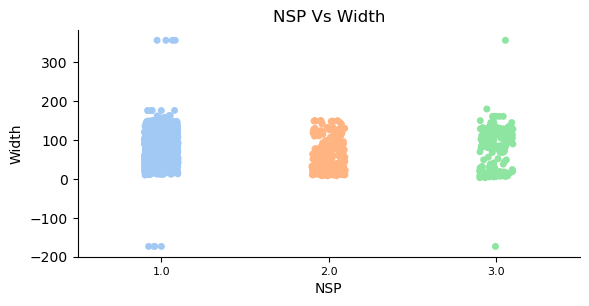

In [47]:
sns.catplot(data,
            y=data['Width'],
            x=data['NSP'],
            kind='strip',
            height=3,
            aspect=2,
            palette='pastel',
           legend=False)

plt.title('NSP Vs Width')
plt.xticks(fontsize=8)
data['NSP']

C:\Users\Dell\AppData\Local\Temp\ipykernel_10552\4023508921.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data,


0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2124, dtype: category
Categories (3, float64): [1.0, 2.0, 3.0]

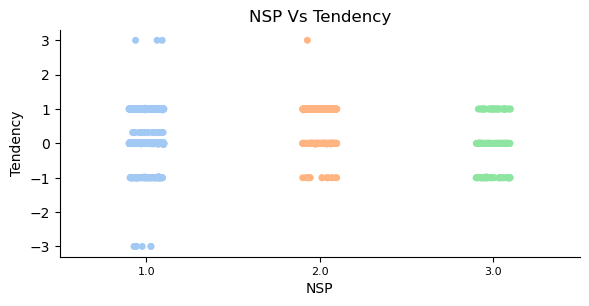

In [48]:
sns.catplot(data,
            y=data['Tendency'],
            x=data['NSP'],
            kind='strip',
            height=3,
            aspect=2,
            palette='pastel',
           legend=False)

plt.title("NSP Vs Tendency")
plt.xticks(fontsize=8)
data['NSP']

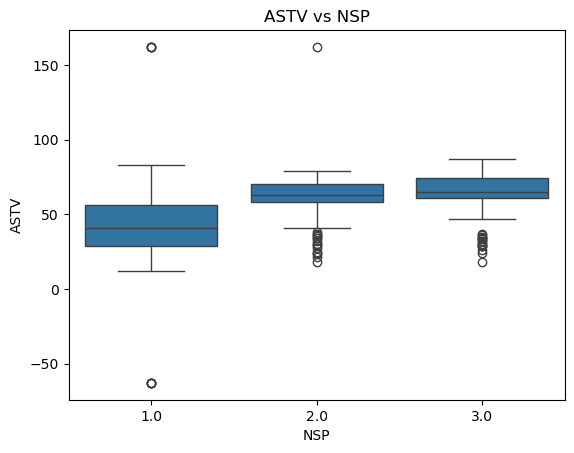

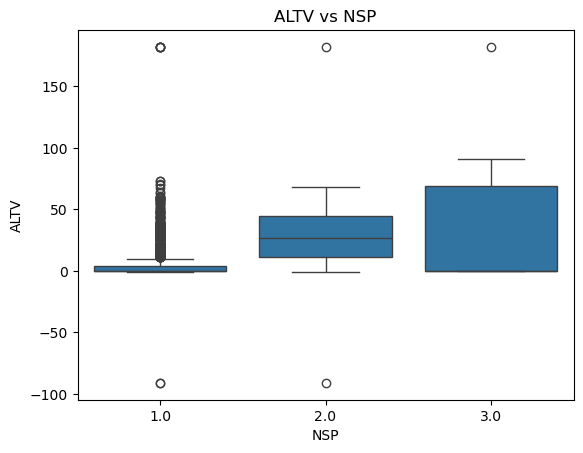

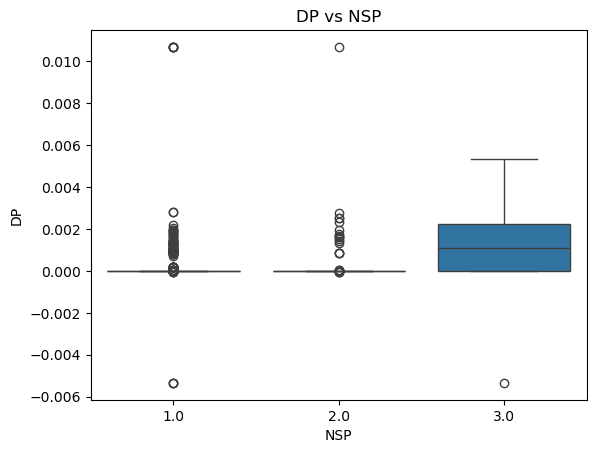

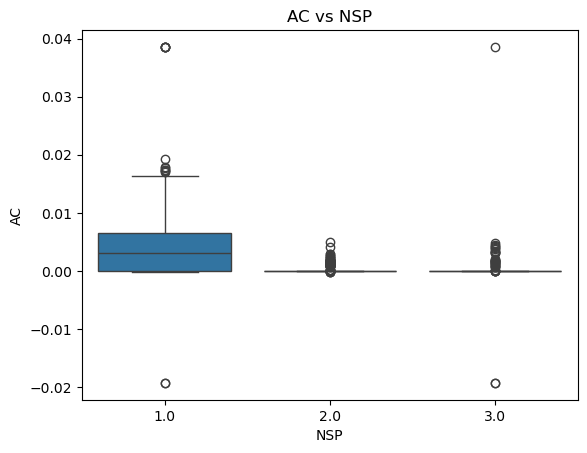

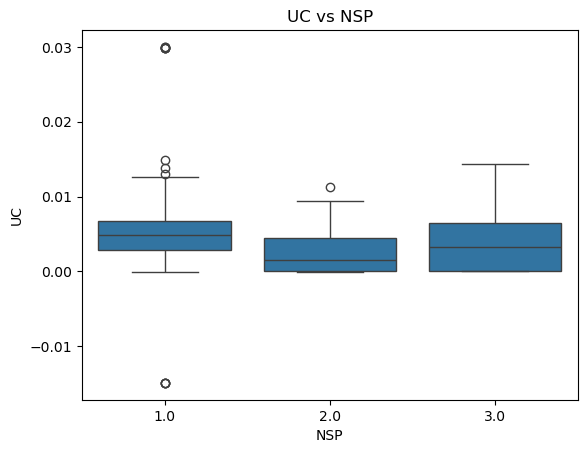

In [49]:
top_features = ['ASTV', 'ALTV', 'DP', 'AC', 'UC']
for feature in top_features:
    sns.boxplot(x='NSP', y=feature, data=data)
    plt.title(f'{feature} vs NSP')
    plt.show()
